# 객체지향 퍼셉트론 구현 

## 1. 클래스 구현

In [56]:
class Perceptron :
    """ implements an one-neuron
    precceptron which performs a linear
    binary classification"""
    def __init__(self, eta=0.1, epochs=10,random_seed=1):
        self.eta = eta #self. = 인스턴스 변수, 메소드가 끝나도 클래스의 속성값으로 남음 = 학습과정에 이용
        self.epochs = epochs
        self.random_seed = random_seed
    
    def fit(self, X, y, X0 = False):
        if X0 == False:
            X = np.c_[np.ones(len(y)), X]
        np.random.seed(self.random_seed)
        self.w = np.random.random(X.shape[1]) # 가중치 (1차원)
        
        self.maxy, self.miny = y.max(), y.min()
        self.cost_ = [] #각 epoch의 손실
        self.w_ = np.array(self.w) # 각 epoch의 가중치
        
        for i in range(self.epochs):
            errors = 0 # 지역변수, 메소드가 끝남과 동시에 사라짐
            for xi, yi in zip(X,y):
                yhat = self.activate(xi)
                delta = self.eta * (yi - yhat) * xi
                self.w = self.w + delta
                if (yi != yhat) : errors += 1
            self.cost_.append(errors)
            self.w_ = np.vstack([self.w_, self.w])
        return self #필수는 아니지만 유용하게 사용 가능
    
    def net_input(self, X): #순입력 z
        if X.shape[0] == self.w.shape[0]:
            z = np.dot(self.w.T, X)
        else:
            z = np.dot(X, self.w[1:]) + self.w[0]
        return z
    
    def activate(self, X) : #활성화 함수
        mid = (self.maxy + self.miny) / 2
        return np.where(self.net_input(X) > mid, self.maxy, self.miny)
    
    def predict(self, X):
        return self.activate(X)

## 2. 객체 생성

In [38]:
!head data/joy_data.txt

1.72	3.12	1
0.31	1.85	1
1.56	2.85	1
2.64	2.41	1
1.23	2.54	1
1.33	2.03	1
1.26	2.68	1
2.58	1.79	1
2.40	0.91	1
0.51	2.44	1


In [39]:
!tail data/joy_data.txt

-3.02	-0.44	-1
-1.05	-3.85	-1
0.28	-1.25	-1
-0.05	-1.95	-1
-3.20	-0.22	-1
-2.26	0.01	-1
-1.41	-0.23	-1
-1.20	-0.71	-1
-1.69	0.70	-1
-1.52	-1.14	-1


In [40]:
import joy

In [41]:
X, y = joy.joy_data()
print('X.shape = {}, y.shape={}'.format(X.shape, y.shape))
print(X[:5], y[:5])
print(X[-5:], y[-5:])

X.shape = (100, 2), y.shape=(100,)
[[1.72 3.12]
 [0.31 1.85]
 [1.56 2.85]
 [2.64 2.41]
 [1.23 2.54]] [1 1 1 1 1]
[[-2.26  0.01]
 [-1.41 -0.23]
 [-1.2  -0.71]
 [-1.69  0.7 ]
 [-1.52 -1.14]] [-1 -1 -1 -1 -1]


데이터가 정렬된 상태이므로 shuffle 필요

### 2.1. 데이터 표준화 및 셔플

In [42]:
X, y = joy.joy_data(standardized=True, shuffled = True)
print(X[:5], y[:5])

[[-1.28409207 -1.15278304]
 [-1.43790346 -0.83714568]
 [ 0.41249418  0.10034442]
 [-1.37731109 -1.63330561]
 [-0.0769057  -1.03500791]] [-1 -1  1 -1 -1]


### 2.2. 퍼셉트론 객체 생성

In [58]:
ppn = Perceptron(eta = 0.1, epochs=10)

### 2.3. 학습

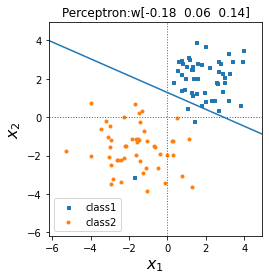

In [74]:
import numpy as np
ppn.epochs = 10
ppn.fit(X,y)
joy.plot_xyw(X, y, ppn.w)

### 2.4. 다른데이터 적용 

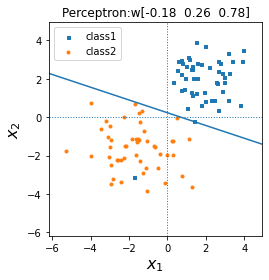

In [72]:
X, y = joy.joy_Ndata()
ppn.fit(X, y)
joy.plot_xyw(X, y, ppn.w)

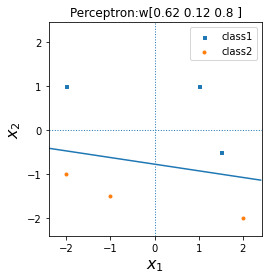

In [62]:
X, y = joy.toy_data()
ppn.fit(X, y)
joy.plot_xyw(X, y, ppn.w)

### 2.5. 학습과정 시각화 - error 개수 확인

Text(0, 0.5, 'Misclassified Samples')

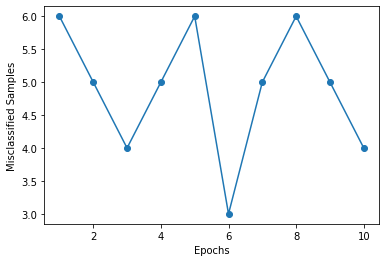

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, len(ppn.cost_)+1), ppn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassified Samples')

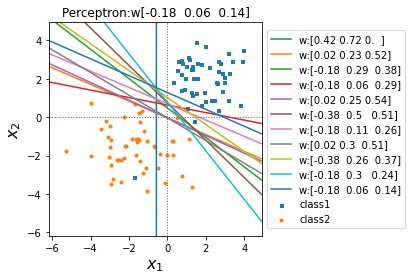

In [78]:
X, y = joy.getXy('data/joy_dataNoise.txt')
ppn = Perceptron(eta=0.1, epochs=10)
ppn.fit(X, y)
joy.plot_xyw(X, y, ppn.w_)

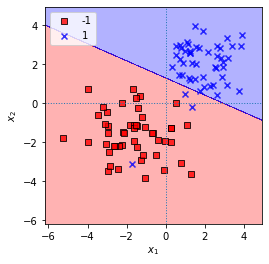

In [79]:
joy.plot_decision_regions(X, y, ppn)